# Multiple DiseaseModel Comparison

This notebook aims to explore, preprocess, and model a dataset to predict the likelihood of multiple. We will compare multiple algorithms to find the best performer based on accuracy, precision, recall, and F1 score.
The dataset used in this notebook is from Kaggle and can be found [here](https://www.kaggle.com/datasets/rabisingh/symptom-checker/data).

## Introduction

A stroke is a medical condition in which poor blood flow to the brain results in cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both result in parts of the brain not functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. A stroke is a medical emergency, and treatment must be sought as quickly as possible. The longer a stroke goes untreated, the greater the potential for brain damage and disability.

## Importing Libraries

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder



## Data Loading

In [124]:
# Load the dataset for Training
multiple_data_train = pd.read_csv('../Datasets/BinaryMultipleTrain.csv')

# Display the first 5 rows of the dataframe
multiple_data_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [125]:
# Load the dataset for Testing
multiple_data_test = pd.read_csv('../Datasets/BinaryMultipleTest.csv')

# Display the first 5 rows of the dataframe
multiple_data_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


## Data Exploration

In [126]:
#Checking the shape of the dataset Training
multiple_data_train.shape

(4920, 133)

In [127]:
#Checking the shape of the dataset Testing
multiple_data_test.shape

(41, 133)

In [128]:
#Basic information about the dataset Training
multiple_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [129]:
#Basic information about the dataset Testing
multiple_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 42.7+ KB


In [130]:
#Summary statistics of the dataset Training
multiple_data_train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
#Summary statistics of the dataset Testing
multiple_data_test.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.146341,0.170732,0.024390,0.048780,0.024390,0.170732,0.146341,0.048780,0.048780,0.024390,...,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390
std,0.357839,0.380949,0.156174,0.218085,0.156174,0.380949,0.357839,0.218085,0.218085,0.156174,...,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
#Checking for unique values in the dataset Training
multiple_data_train.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

In [133]:
#Checking for unique values in the dataset Testing
multiple_data_test.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

In [134]:
#Checking Data Types Training
multiple_data_train.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [135]:
#Checking Data Types Testing
multiple_data_test.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [136]:
#Checking for missing values in the dataset Training
multiple_data_train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [137]:
#Checking for missing values in the dataset Testing
multiple_data_test.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

### Data Visualization

In [138]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

#### Initial Data Exploration

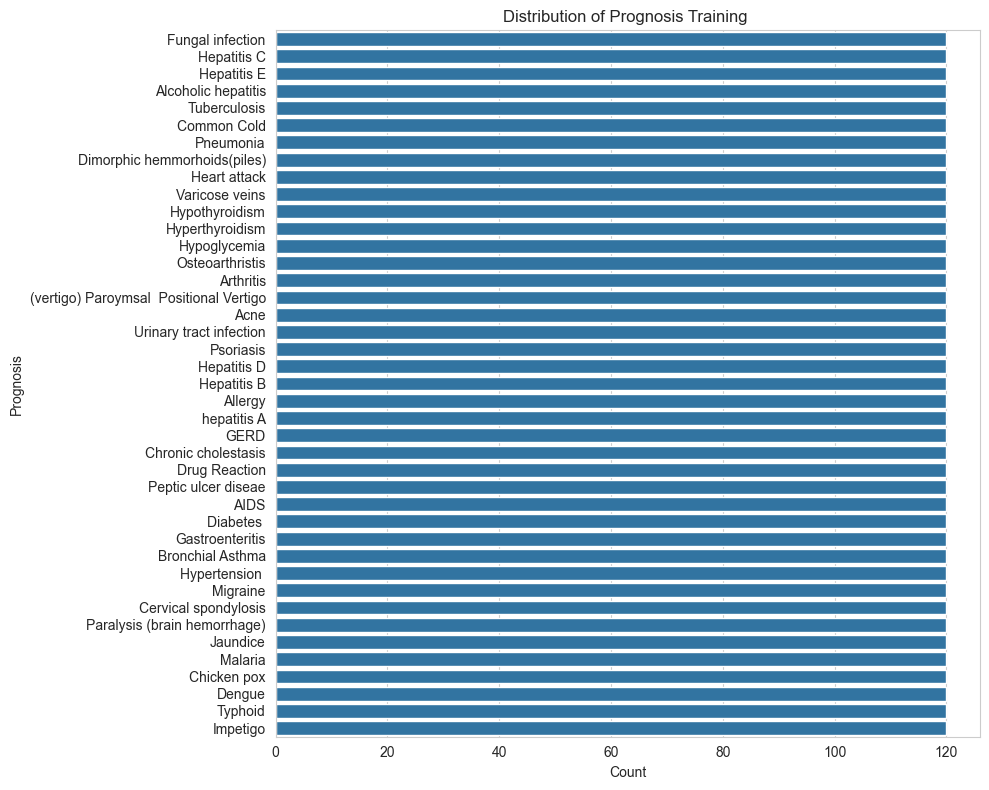

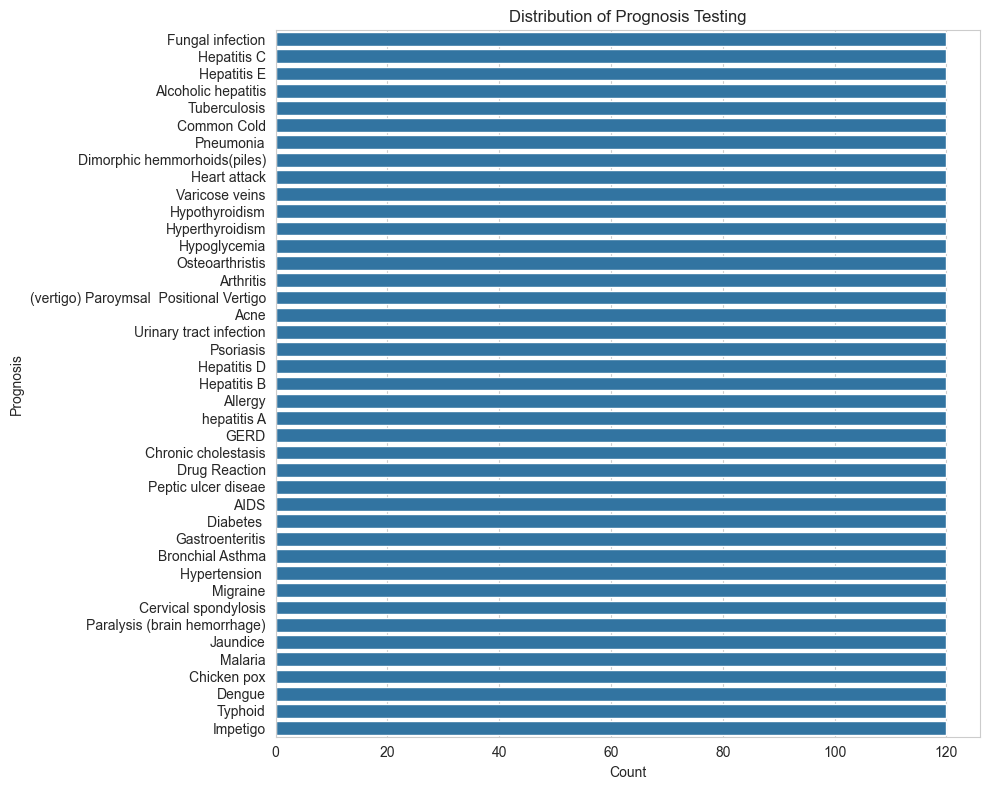

In [139]:
# Prepare the figure for the distribution of prognosis Training
plt.figure(figsize=(10, 8))
sns.countplot(y='prognosis', data=multiple_data_train, order = multiple_data_train['prognosis'].value_counts().index)
plt.title('Distribution of Prognosis Training ')
plt.xlabel('Count')
plt.ylabel('Prognosis')
plt.tight_layout()
plt.show()

# Prepare the figure for the distribution of prognosis Testing
plt.figure(figsize=(10, 8))
sns.countplot(y='prognosis', data=multiple_data_train, order = multiple_data_test['prognosis'].value_counts().index)
plt.title('Distribution of Prognosis Testing')
plt.xlabel('Count')
plt.ylabel('Prognosis')
plt.tight_layout()
plt.show()




### Attribute Information

* Itching: An uncomfortable sensation on the skin that provokes the desire to scratch.
* Irritability: A feeling of agitation or frustration.
* Depression: A mental health disorder characterized by persistently low mood and aversion to activity.
* Toxic Look (Typhos): A state of exhaustion with dull eyes and lethargy, often associated with severe infection.
* Internal Itching: Sensation of itching beneath the skin, which could be caused by various conditions.
* Passage of Gases: The discharge of gas from the digestive system through the rectum, also known as flatulence.
* Continuous Feel of Urine: A persistent sensation of needing to urinate.
* Foul Smell of Urine: Unpleasant odor of urine, can indicate infection or dietary factors.
* Bladder Discomfort: Discomfort or pain associated with the bladder.
* Loss of Smell: Inability to perceive odors, also known as anosmia.
* Weakness of One Body Side: Loss of strength in either the left or right side of the body.
* Unsteadiness: Lack of stability in movement, possibly affecting balance.
* Loss of Balance: Difficulty maintaining equilibrium.
* Spinning Movements: The sensation of the surrounding environment moving or spinning.
* Movement Stiffness: Difficulty in moving freely, often associated with joint or muscle issues.
* Swelling Joints: Inflammation or enlargement of a joint.
* Stiff Neck: Difficulty and discomfort in moving the neck.
* Muscle Weakness: Reduced strength in one or more muscles.
* Hip Joint Pain: Pain located in or around the hip joint.
* Knee Pain: Discomfort or pain in the knee area.
* Slurred Speech: Impaired speech where words are not articulated clearly.
* Drying and Tingling Lips: A sensation of dryness and prickling on the lips.
* Extra Marital Contacts: Engaging in sexual activities outside of marriage, mentioned in medical contexts related to sexually transmitted infections (STIs).
* Excessive Hunger: An increased desire to eat more frequently or in larger quantities than normal.
* Swollen Extremities: Enlargement of the limbs due to fluid accumulation or inflammation.
* Brittle Nails: Nails that easily become broken or cracked.
* Enlarged Thyroid: Swelling of the thyroid gland, visible in the neck.
* Puffy Face and Eyes: Swelling of the facial area and around the eyes.
* Swollen Blood Vessels: Enlargement and possibly inflammation of the blood vessels.
* Swollen Legs: Increased size of the legs due to fluid build-up or inflammation.
* Muscle Pain: Discomfort or pain in the muscles.
* Altered Sensorium: A change in the perception of or interaction with the surrounding environment.
* Red Spots Over Body: Reddish lesions on the skin.
* Belly Pain: Pain in the abdominal area.
* Red Sore Around Nose: Red, painful area around the nose.
* Blister: A small pocket of body fluid within the upper layers of the skin.
* Inflammatory Nails: Swelling or redness around the nails, often indicating infection or inflammation.
* Small Dents in Nails: Indentations or pits in the nail surface.
* Silver Like Dusting: A description that might refer to a flaky or powdery appearance on the skin.
* Skin Peeling: The shedding of the outer layer of the skin.
* Scurring: Possibly a misspelling or a term not widely recognized; context needed for accurate description.
* Blackheads: Small, dark lesions that appear on the skin due to clogged hair follicles.
* Pus Filled Pimples: Inflammatory acne containing pus.
* Painful Walking: Discomfort while walking, which may be due to a variety of foot or leg conditions.
* Palpitations: Feeling a rapid, strong, or irregular heartbeat.
* Prominent Veins on Calf: Visible or bulging veins on the lower leg.
* Blood in Sputum: Presence of blood in saliva or phlegm, often a sign of respiratory issues.
* Fluid Overload: An excess of fluid in the body, also known as hypervolemia.
* Obesity: Having a body weight that is significantly above what is considered healthy for a given height.
* History of Alcohol Consumption: Personal record of drinking alcoholic beverages.
* Stomach Bleeding: Bleeding within the stomach, which may manifest as blood in vomit or stool.
* Coma: A state of deep unconsciousness that can be caused by illness, injury, or poisoning.
* Receiving Unsterile Injections: Risk of infection due to non-sterile needles.
* Receiving Blood Transfusion: Getting blood from another person, with potential for reactions or disease transmission if not properly screened.
* Lack of Concentration: Difficulty in focusing attention or mental effort.
* Rusty Sputum: Brownish or red-tinged mucus coughed up, often indicating blood.
* Mucoid Sputum: Mucus-like substance expelled from the respiratory tract.
* Family History: Medical issues present in relatives that may affect an individual's health risk.
* Polyuria: Excessive or abnormally large production or passage of urine.
* Increased Appetite: Abnormally strong desire for food intake.
* Watering from Eyes: Excessive tear production, may indicate irritation or allergy.
* Dischromic Patches: Patches of skin with altered coloration.
* Abnormal Menstruation: Irregular or unusual menstrual cycles.
* Distention of Abdomen: Swelling or bloating of the stomach area.
* Yellow Crust Ooze: Dried pus on a wound, often yellowish, indicating infection.
* Bruising: Discoloration and swelling in skin from trauma.
* Dizziness: Sensation of unsteadiness or spinning.
* Dehydration: Excessive loss of body fluids.
* Sweating: Perspiration, potentially excessive or inadequate.
* Breathlessness: Difficulty breathing or shortness of breath.
* Sunken Eyes: Eyes that appear deeply recessed, often due to dehydration or malnutrition.
* High Fever: Elevated body temperature indicating infection or other health issues.
* Cough: Reflex action to clear airways of mucus or irritants.
* Irregular Sugar Level: Abnormal glucose levels in the blood, related to diabetes.
* Patches in Throat: Discolored areas in the throat, possibly indicating infection.
* Lethargy: Lack of energy or enthusiasm.
* Restlessness: Inability to relax or remain still.
* Weight Loss: Unintentional reduction in body weight.
* Mood Swings: Rapid changes in mood or emotional state.
* Cold Hands and Feets: Poor circulation or temperature regulation leading to cool extremities.
* Anxiety: Feeling of worry, nervousness, or unease.
* Weight Gain: Increase in body weight.
* Fatigue: Extreme tiredness or lack of energy.
* Spotting Urination: Light bleeding or spotting in urine, not part of menstrual bleeding.
* Burning Micturition: Burning sensation during urination.
* Vomiting: Expelling contents of the stomach through the mouth.
* Muscle Wasting: Loss of muscle mass or strength.
* Ulcers on Tongue: Painful sores on the tongue.
* Acidity: Excess stomach acid leading to discomfort or gastroesophageal reflux.
* Stomach Pain: Ache or discomfort in the abdominal area.
* Joint Pain: Discomfort arising in any joint.
* Chills: Feeling cold without an apparent cause, often with shivering.
* Shivering: Involuntary shaking or trembling, often due to cold.
* Continuous Sneezing: Successive, uncontrollable sneezing.
* Nodal Skin Eruptions: Raised bumps on the skin, potentially indicating an underlying condition.
* Skin Rash: Change in skin color or texture that is often itchy.
* Indigestion: Discomfort in the stomach associated with difficulty in digesting food.
* Headache: Pain in the head or upper neck region.
* Yellowish Skin: Skin taking on a yellow tone, possibly indicating jaundice.
* Dark Urine: Urine that is darker than usual, potentially a sign of dehydration or liver issues.
* Neck Pain: Discomfort located in the neck area.
* Irritation in Anus: Discomfort or itchiness in the anal region.
* Bloody Stool: Presence of blood in feces.
* Pain in Anal Region: Discomfort located around or in the anus.
* Pain During Bowel Movements: Discomfort occurring when passing stools.
* Fast Heart Rate: Abnormally rapid heartbeat.
* Weakness in Limbs: Reduced strength or sensation in arms and/or legs.
* Congestion: Blockage of a body part leading to buildup of fluid or other material.
* Runny Nose: Excess drainage, which may be clear or filled with mucus, from the nose.
* Sinus Pressure: Feeling of pressure or fullness in the sinus cavities.
* Redness of Eyes: Bloodshot appearance of the eyes, often from irritation or infection.
* Throat Irritation: Discomfort or pain in the throat.
* Phlegm: Thick, sticky mucus secreted by the mucous membranes of respiratory tract.
* Cramps: Painful involuntary muscular contractions.
* Blurred and Distorted Vision: Impaired vision that is not clear or that may be warped.
* Swelled Lymph Nodes: Enlarged lymph nodes, which can indicate an infection.
* Swelling of Stomach: Enlargement of the belly area.
* Fluid Overload: Excess fluid in the body, which can lead to swelling and other complications.
* Acute Liver Failure: Sudden loss of liver function.
* Yellowing of Eyes: Discoloration of the whites of the eyes, often related to liver problems.
* Yellow Urine: Urine with a deep yellow color, which can be a sign of dehydration or other health issues.
* Mild Fever: Slightly elevated body temperature.
* Diarrhoea: Frequent loose or liquid bowel movements.
* Abdominal Pain: Pain in the belly.
* Constipation: Difficulty or infrequency in bowel movements.
* Back Pain: Discomfort in the lower, middle, or upper back.
* Pain Behind the Eyes: Pain perceived around or behind the eyeballs.
* Loss of Appetite: Decreased desire to eat.
* Nausea: Feeling of urge to vomit.
* Malaise: General feeling of discomfort or uneasiness.
* Prognosis: Medical term for the predicted course and outcome of a disease.

## Data Preprocessing

### Handling Missing Values

In [140]:
# Check if BMI is imputed correctly
multiple_data_train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [141]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the 'prognosis' column of the training set
label_encoder.fit(multiple_data_train['prognosis'])

# Transform the 'prognosis' column of the training set
multiple_data_train['prognosis'] = label_encoder.transform(multiple_data_train['prognosis'])

In [142]:
multiple_data_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


### Splitting the Data

In [143]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming 'multiple_data_train' is your DataFrame and 'prognosis' is your target variable
X = multiple_data_train.drop('prognosis', axis=1).values
y = multiple_data_train['prognosis'].values

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [144]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')  
    recall = recall_score(y_test, y_pred, average='micro')  
    f1 = f1_score(y_test, y_pred, average='micro')  

    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

## Model Building

### Logistic Regression

Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


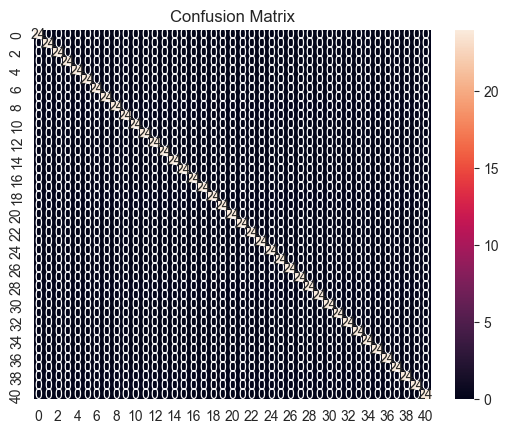

In [145]:
print("Logistic Regression:")
lr = LogisticRegression()
evaluate_model(lr, X_train, y_train, X_test, y_test)

### Decision Tree

Decision Trees:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


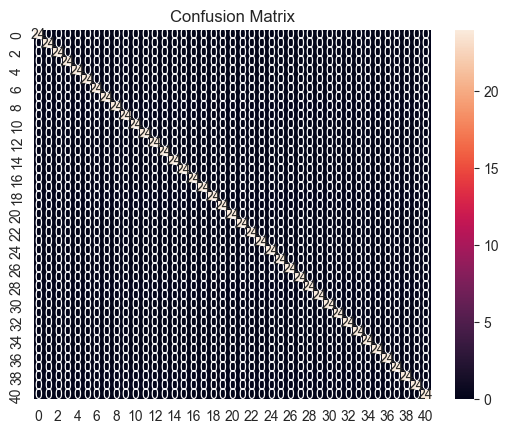

In [146]:
print("Decision Trees:")
dt = DecisionTreeClassifier()
evaluate_model(dt, X_train, y_train, X_test, y_test)

### Random Forest

Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


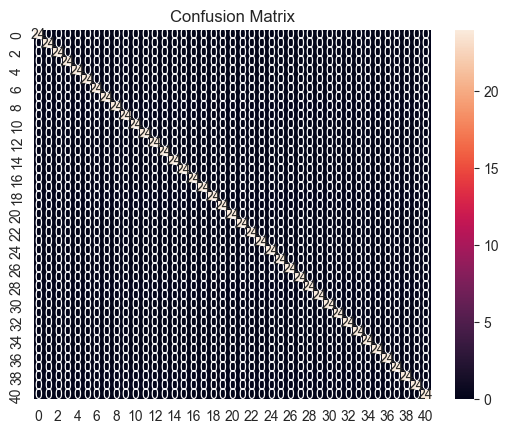

In [147]:
print("Random Forest:")
rf = RandomForestClassifier()
evaluate_model(rf, X_train, y_train, X_test, y_test)

### Support Vector Machine (SVM)

Support Vector Machines:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


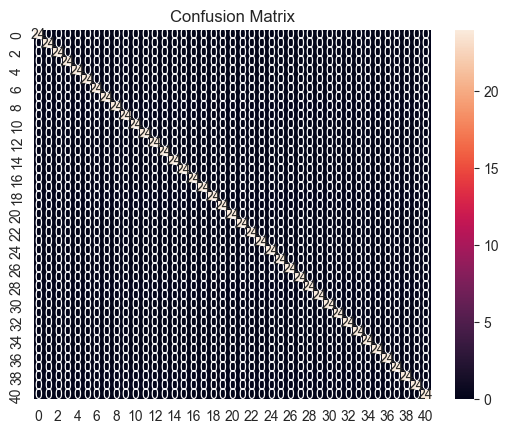

In [148]:
print("Support Vector Machines:")
svc = SVC()
evaluate_model(svc, X_train, y_train, X_test, y_test)

### Naive Bayes (GaussianNB)

Naive Bayes:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


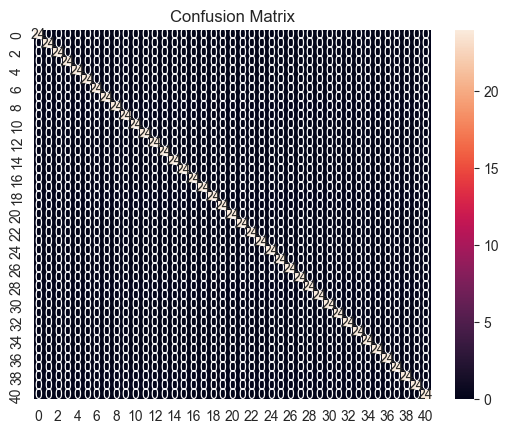

In [149]:
print("Naive Bayes:")
nb = GaussianNB()
evaluate_model(nb, X_train, y_train, X_test, y_test)

## Hyperparameter Tuning

### Logistic Regression with Hyperparameter Tuning

c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters:  {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.08858667904100823}


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


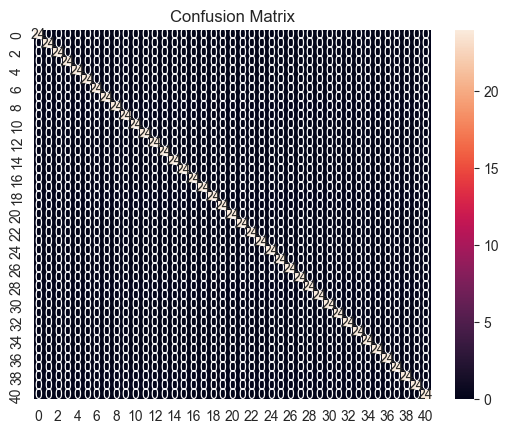

In [150]:
param_grid_lr = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Both support l1 and l2 penalties.
}

lr = LogisticRegression(max_iter=10000, random_state=42)
rnd_search_lr = RandomizedSearchCV(lr, param_distributions=param_grid_lr, n_iter=10, cv=5, scoring='recall', random_state=42, n_jobs=-1)
rnd_search_lr.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", rnd_search_lr.best_params_)

evaluate_model(rnd_search_lr, X_train, y_train, X_test, y_test)


### Decision Tree with Hyperparameter Tuning

c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Accuracy: 0.7876016260162602
Precision: 0.7876016260162602
Recall: 0.7876016260162602
F1 Score: 0.7876016260162602


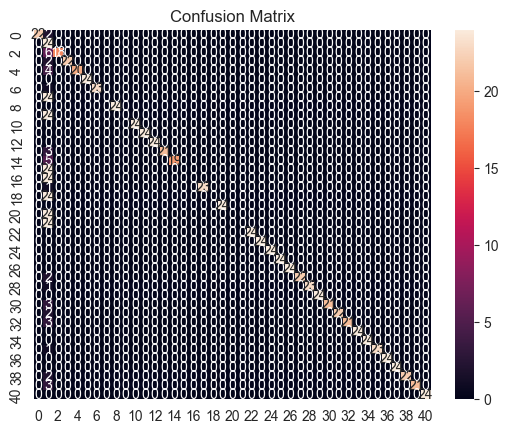

In [151]:

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
rnd_search_dt = RandomizedSearchCV(dt, param_distributions=param_grid_dt, n_iter=10, cv=5, scoring='recall', random_state=42, n_jobs=-1)
rnd_search_dt.fit(X_train, y_train)

print("Best parameters found: ", rnd_search_dt.best_params_)

evaluate_model(rnd_search_dt, X_train, y_train, X_test, y_test)


### Random Forest with Hyperparameter Tuning

c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


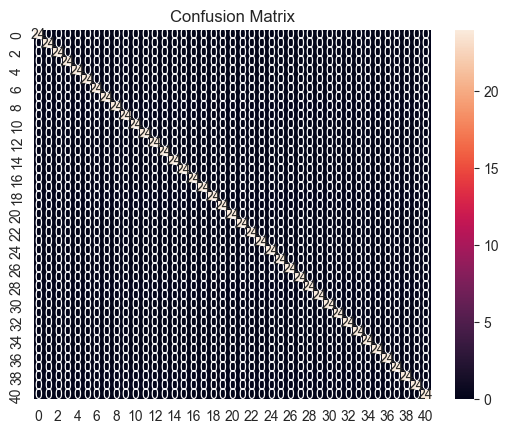

In [152]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
rnd_search_rf = RandomizedSearchCV(rf, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='recall', random_state=42, n_jobs=-1)
rnd_search_rf.fit(X_train, y_train)

print("Best parameters found: ", rnd_search_dt.best_params_)

evaluate_model(rnd_search_rf, X_train, y_train, X_test, y_test)


### Support Vector Machine (SVM) with Hyperparameter Tuning

c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


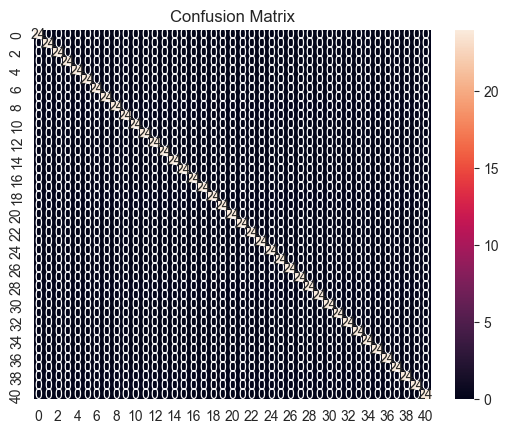

In [153]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc = SVC(random_state=42)
rnd_search_svc = RandomizedSearchCV(svc, param_distributions=param_grid_svc, n_iter=10, cv=5, scoring='recall', random_state=42, n_jobs=-1)
rnd_search_svc.fit(X_train, y_train)

print("Best parameters found: ", rnd_search_dt.best_params_)

evaluate_model(rnd_search_svc, X_train, y_train, X_test, y_test)


In [154]:
## Grid Search

c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': None}


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


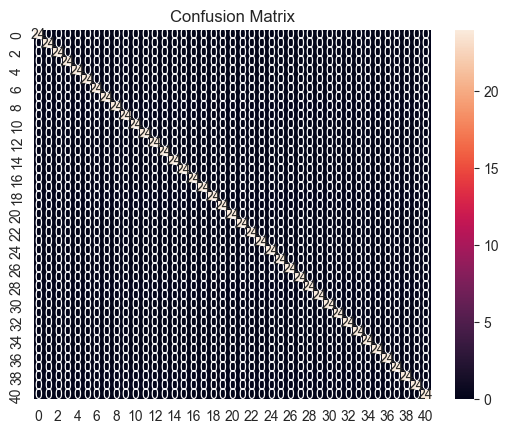

In [155]:
from sklearn.model_selection import GridSearchCV

# Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='recall', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree: ", grid_search_dt.best_params_)
evaluate_model(grid_search_dt, X_train, y_train, X_test, y_test)

c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': None, 'n_estimators': 10}


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  warnings.warn(


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


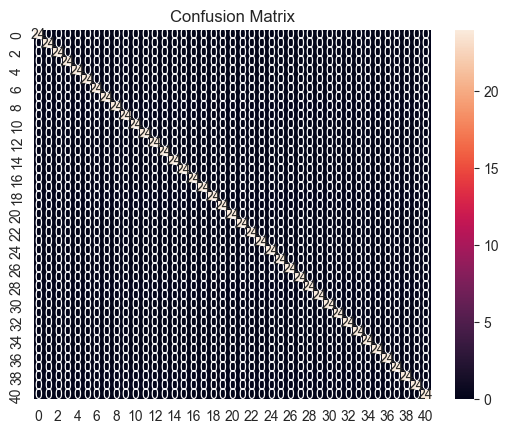

In [156]:
# Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='recall', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
evaluate_model(grid_search_rf, X_train, y_train, X_test, y_test)

c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for Support Vector Machine:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


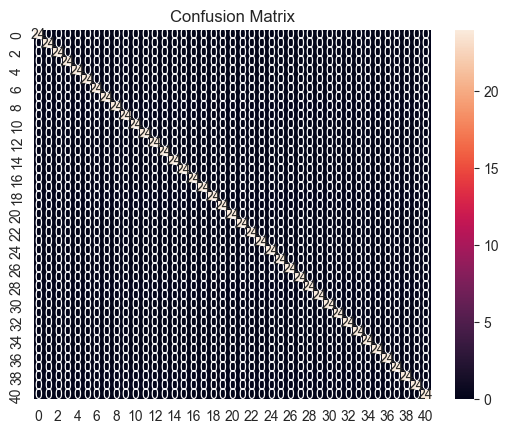

In [157]:
# Support Vector Machine
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='recall', n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

print("Best parameters for Support Vector Machine: ", grid_search_svc.best_params_)
evaluate_model(grid_search_svc, X_train, y_train, X_test, y_test)